In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('test.txt', sep=';',names = ['Message','Emotion'])
df

,Message,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [4]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
df.describe()

,Message,Emotion
count,2000,2000
unique,2000,6
top,im feeling rather rotten so im not very ambiti...,joy
freq,1,695


In [6]:
df.groupby('Emotion').describe()

Message                                                            \
           count unique                                                top   
Emotion                                                                      
anger        275    275   i felt anger when at the end of a telephone call   
fear         224    224  i cant walk into a shop anywhere where i do no...   
joy          695    695  i left with my bouquet of red and yellow tulip...   
love         159    159  i find myself in the odd position of feeling s...   
sadness      581    581  im feeling rather rotten so im not very ambiti...   
surprise      66     66  i feel a little stunned but can t imagine what...   

               
         freq  
Emotion        
anger       1  
fear        1  
joy         1  
love        1  
sadness     1  
surprise    1

In [7]:
df['Length'] = df['Message'].apply(len)
df

,Message,Emotion,Length
0,im feeling rather rotten so im not very ambiti...,sadness,59
1,im updating my blog because i feel shitty,sadness,41
2,i never make her separate from me because i do...,sadness,97
3,i left with my bouquet of red and yellow tulip...,joy,113
4,i was feeling a little vain when i did this one,sadness,47
...,...,...,...
1995,i just keep feeling like someone is being unki...,anger,163
1996,im feeling a little cranky negative after this...,anger,66
1997,i feel that i am useful to my people and that ...,joy,85
1998,im feeling more comfortable with derby i feel ...,joy,88


<AxesSubplot:xlabel='Length', ylabel='Count'>

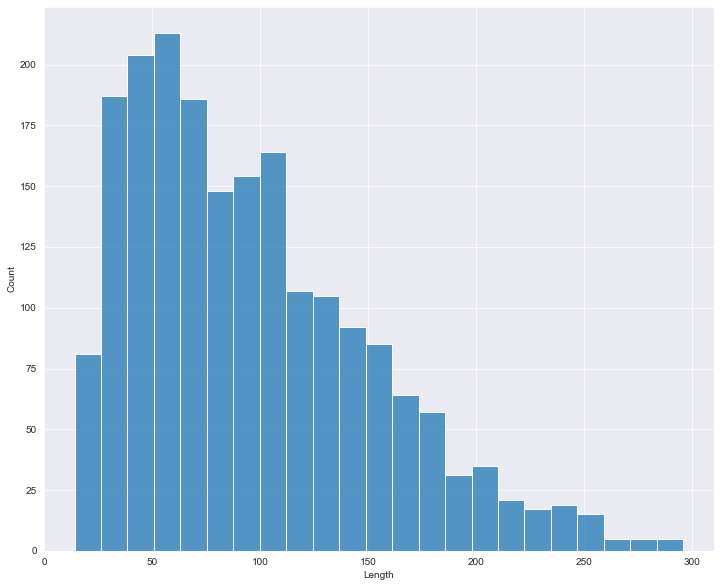

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
sns.histplot(df['Length'])

In [9]:
df['Length'].max()

296

In [10]:
df['Length'].min()

14

In [11]:
df[df['Length'] == df['Length'].max()]

,Message,Emotion,Length
618,i am feeling a little more relaxed i am certai...,joy,296


In [12]:
df[df['Length'] == df['Length'].min()]

,Message,Emotion,Length
221,i feel alarmed,fear,14


<AxesSubplot:xlabel='Emotion', ylabel='Count'>

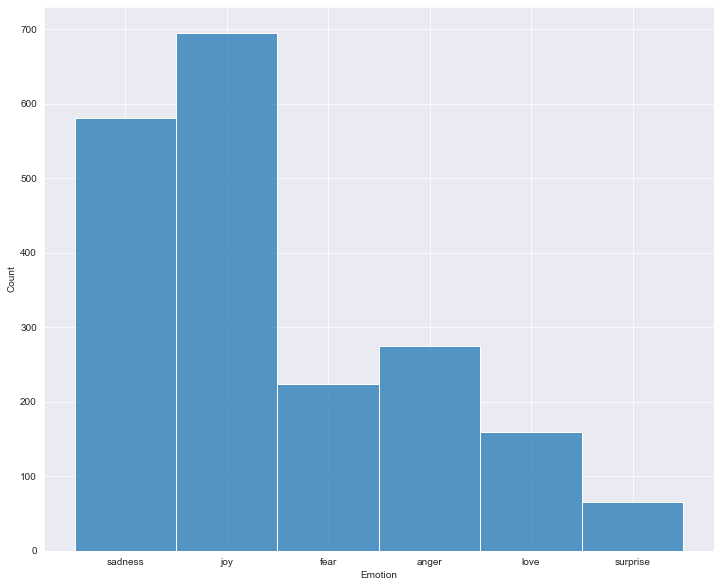

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
sns.histplot(df['Emotion'])

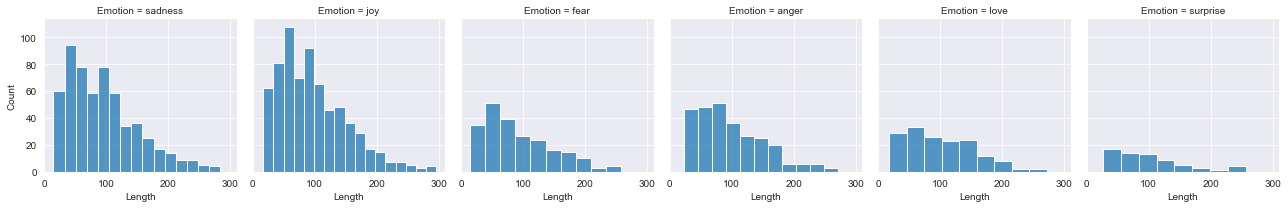

In [14]:
g = sns.FacetGrid(df, col='Emotion')
g.map_dataframe(sns.histplot, x='Length')

<AxesSubplot:ylabel='Count'>

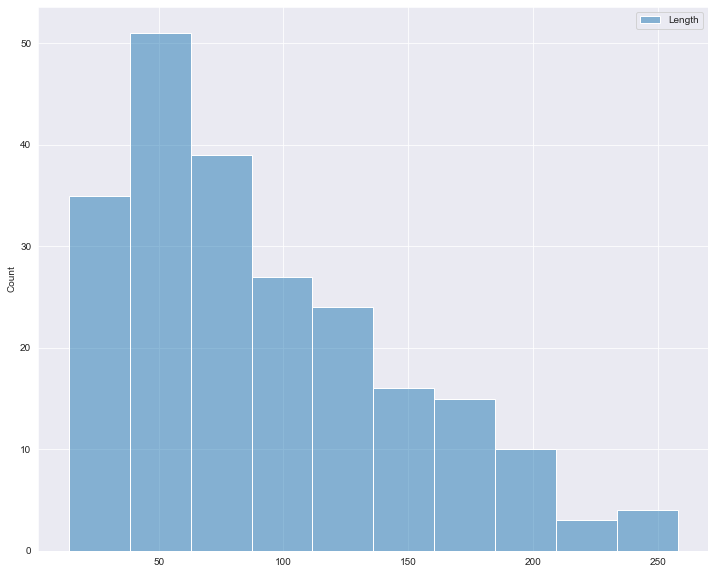

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
sns.histplot(df[df['Emotion'] == 'fear']) 

<AxesSubplot:xlabel='Emotion', ylabel='count'>

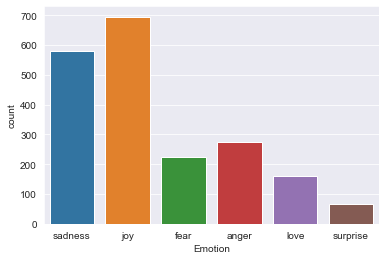

In [16]:
b = sns.countplot(x = 'Emotion', data=df)
b

In [17]:
x=df['Message']
y=df['Emotion']

# COUNTVECTORIZER

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
CountVectorizer()

CountVectorizer()

In [20]:
cv = CountVectorizer()

In [21]:
react = cv.fit_transform(x)
react

<2000x4778 sparse matrix of type '<class 'numpy.int64'>'
	with 31349 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

# MULTINOMIAL

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
model = MultinomialNB().fit(react,df['Emotion'])

In [26]:
m = model.predict(react)
m

array(['sadness', 'sadness', 'sadness', ..., 'joy', 'joy', 'sadness'],
      dtype='<U8')

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(df['Emotion'], m))

              precision    recall  f1-score   support

       anger       0.99      0.73      0.84       275
        fear       0.98      0.64      0.78       224
         joy       0.80      0.99      0.88       695
        love       1.00      0.38      0.55       159
     sadness       0.80      0.99      0.89       581
    surprise       1.00      0.12      0.22        66

    accuracy                           0.84      2000
   macro avg       0.93      0.64      0.69      2000
weighted avg       0.87      0.84      0.82      2000



# KNN

In [29]:
#from sklearn.neighbors import KNeighborsClassifier

In [30]:
#knn = KNeighborsClassifier(7)

In [31]:
#new_model = knn.fit(react, df['Emotion'])

In [32]:
#new_model

In [33]:
#react = cv.transform(x)
#react

In [34]:
#m = new_model.predict(react)
#m

In [35]:
#predictions = knn.predict(react)

In [36]:
#from sklearn.metrics import classification_report

In [37]:
#print(classification_report(df['Emotion'],predictions))

# SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC()

In [40]:
svc_model = svc.fit(react, df['Emotion'])

In [41]:
svc_model

SVC()

In [42]:
predictions = svc.predict(react)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
confusion_matrix(df['Emotion'],predictions)

array([[168,   0,  67,   0,  40,   0],
       [  0, 123,  60,   0,  41,   0],
       [  0,   0, 685,   0,  10,   0],
       [  0,   0,  75,  57,  27,   0],
       [  0,   0,  29,   0, 552,   0],
       [  0,   1,  41,   0,  11,  13]], dtype=int64)

In [45]:
print(classification_report(df['Emotion'],predictions))

              precision    recall  f1-score   support

       anger       1.00      0.61      0.76       275
        fear       0.99      0.55      0.71       224
         joy       0.72      0.99      0.83       695
        love       1.00      0.36      0.53       159
     sadness       0.81      0.95      0.87       581
    surprise       1.00      0.20      0.33        66

    accuracy                           0.80      2000
   macro avg       0.92      0.61      0.67      2000
weighted avg       0.85      0.80      0.78      2000



# GRID PREDICTION

In [46]:
param_grid = {'C':[0.1,1,10,100,1000],    #how much error allowed
             'gamma':[1,0.1,0.001,0.0001],#how much overfitting allowed
             'kernel':['rbf']}

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid = GridSearchCV(SVC(),param_grid, refit=True, verbose=3)

In [ ]:
grid.fit(react,df['Emotion'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.347 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.347 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.347 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.347 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.347 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.347 total time=   0.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.347 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.347 total time=   0.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.347 total time=   0.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.347 total time=   0.7s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.347 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

In [ ]:
gridPredictions = grid.predict(react)

In [ ]:
print(classification_report(df['Emotion'],gridPredictions))

# PIPELINE

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('cvc', CountVectorizer()),
    ('classifier',SVC(C= 1000, gamma = 0.001, kernel= 'rbf'))
])

In [ ]:
pipeline.fit(df['Message'],df['Emotion'])

In [ ]:
pp = pipeline.predict(['i feel like i have to make the suffering i m seeing mean something'])

# PICKLE

In [ ]:
import pickle

In [ ]:
pickle.dump(knn, open("model.pkl", "wb"))

In [ ]:
X.columns

In [ ]:
saved_model.predict([[]])

In [ ]:
prediction_proba = saved_model.predict_proba([[]])
prediction_proba

In [ ]:
np.round(prediction_proba.max() * 100, 2)